In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [121]:
# print(os.listdir(os.getcwd()))

In [19]:
benchmark = "blackscholes"

In [122]:
import json
import os
import matplotlib.pyplot as plt

opt_data = []

for i in range(1, 24, 1):
    name = f'../log/{benchmark}_1_{i}_for_real_time.json'
    with open(name, 'r') as file:
        content = file.readlines()
        for line in content:
            try:
                data = json.loads(line)
                opt_data.append(
                    {'cpu_usage': data['params']['cpu_usage'],'memory_usage': data['params']['memory_usage']/10**9, 'gen': i})
                break
            except json.JSONDecodeError as e:
                print(f"Error en el archivo {name}: {e}")
df_opt = pd.DataFrame(opt_data)
df_opt.head()

,cpu_usage,memory_usage,gen
0,2.128807,4.104007,1
1,2.426748,4.104007,2
2,2.426748,4.589090,3
3,2.687402,4.515848,4
4,3.159330,4.515848,5


In [110]:

dfs = []
all = []
lines_processed = 0  # Inicializa el número de líneas procesadas
skip_lines = True
for i in range(1, 7, 1):
    try:
        name = f'../result/{benchmark}_1_{i}.csv'
        # Salta las líneas ya procesadas
        if (skip_lines):
            df = pd.read_csv(name, skiprows=lines_processed)
            if (lines_processed > 0):
                header_names = pd.read_csv(name, nrows=0).columns
                df.columns = header_names
            # Actualiza el número de líneas procesadas
            lines_processed += len(df)
        else:
            df = pd.read_csv(name)
        dfs.append(df)

    except FileNotFoundError as e:
        print(f"File {name} not found.")
    except pd.errors.EmptyDataError as e:
        print(f"File {name} is empty.")
    except pd.errors.ParserError as e:
        print(f"Error parsing file {name}: {str(e)}")
    except Exception as e:
        print(f"An unexpected error occurred while reading {name}: {str(e)}")

all_dfs = pd.DataFrame()
for i, df in enumerate(dfs):
    print(i)
    df['gen'] = int(i+1)
    if all_dfs.empty:
        all_dfs = df
    else:
        all_dfs = pd.concat([all_dfs, df], ignore_index=True)
dfs.append(all_dfs)

0
1
2
3
4
5


In [124]:
dfs2 = []
all = []
lines_processed = 0  # Inicializa el número de líneas procesadas
skip_lines = False
benchmark = "blackscholes2"
for i in range(1, 6, 1):
    try:
        name = f'../result/{benchmark}_1_{i}.csv'
        # Salta las líneas ya procesadas
        if (skip_lines):
            df = pd.read_csv(name, skiprows=lines_processed)
            if (lines_processed > 0):
                header_names = pd.read_csv(name, nrows=0).columns
                df.columns = header_names
            # Actualiza el número de líneas procesadas
            lines_processed += len(df)
        else:
            df = pd.read_csv(name)
        dfs2.append(df)

    except FileNotFoundError as e:
        print(f"File {name} not found.")
    except pd.errors.EmptyDataError as e:
        print(f"File {name} is empty.")
    except pd.errors.ParserError as e:
        print(f"Error parsing file {name}: {str(e)}")
    except Exception as e:
        print(f"An unexpected error occurred while reading {name}: {str(e)}")

all_dfs2 = pd.DataFrame()
for i, df in enumerate(dfs2):
    print(i)
    df['gen'] = int(i+1)
    if all_dfs2.empty:
        all_dfs2 = df
    else:
        all_dfs2 = pd.concat([all_dfs2, df], ignore_index=True)
dfs2.append(all_dfs2)

0
1
2
3
4


In [5]:
dfs[0].mean()

Series([], dtype: float64)

In [126]:
# import seaborn as sns
# # Calcular la matriz de covarianza
# cov_matrix = df.cov()

# # Graficar la matriz de covarianza usando seaborn y matplotlib
# plt.figure(figsize=(8, 6))
# sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Matriz de Covarianza')
# plt.show()

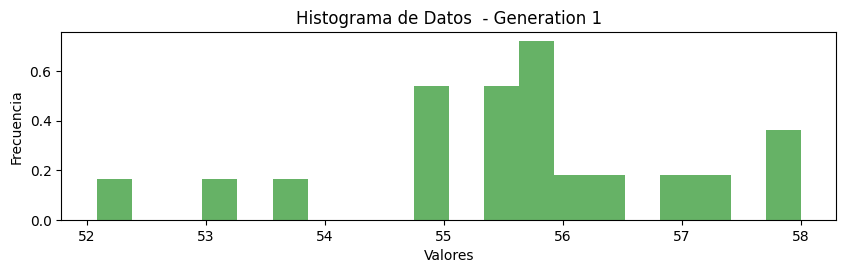

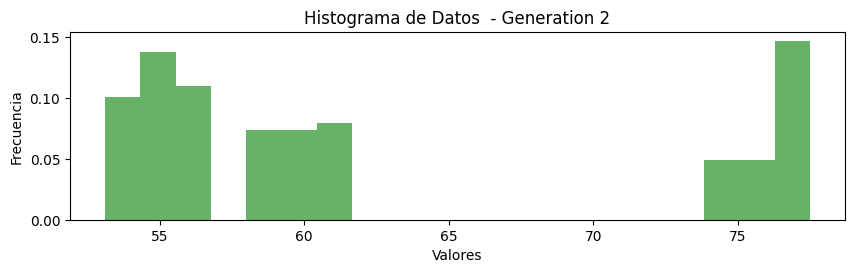

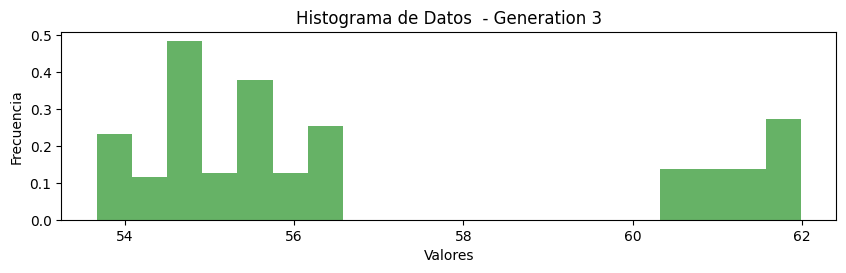

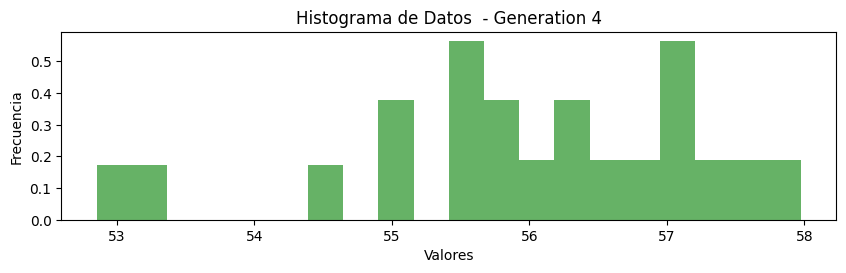

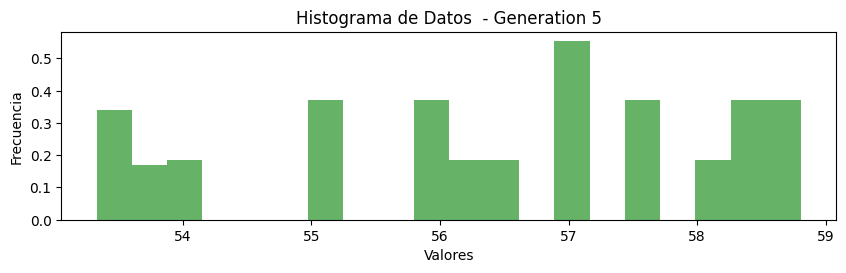

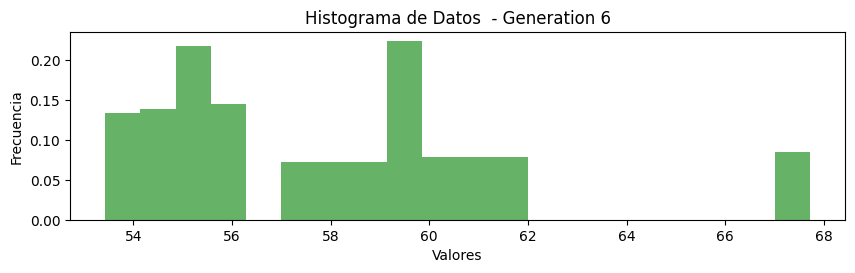

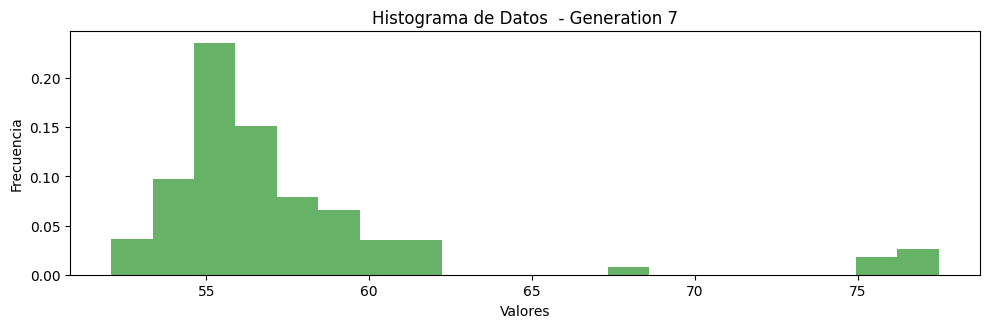

In [111]:
import matplotlib.pyplot as plt


# Iterar a través del array de DataFrames y trazar el uso de memoria vs tiempo
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 20))
    plt.subplot(len(dfs), 1, i + 1)
    plt.hist(df['real_time'], bins=20, density=True, alpha=0.6, color='g')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de Datos  - Generation {i+1}')
plt.tight_layout()
plt.show()

# Ejemplo de histograma


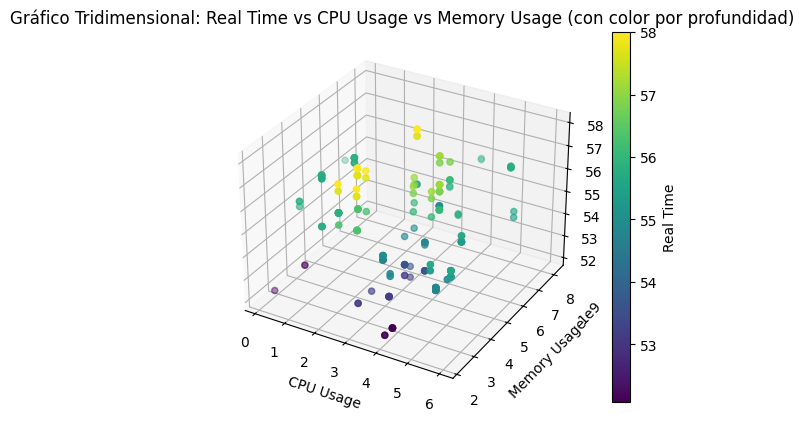

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Ejemplo de datos (reemplaza esto con tus datos reales)
# Supongamos que tienes un DataFrame con estas columnas: real_time, cpu_usage, memory_usage

# Crear un DataFrame a partir de los datos (reemplaza esto con tu DataFrame)
df = dfs[0]

# Crear la figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar dispersión tridimensional con escala de colores basada en la memoria
scatter = ax.scatter(df['cpu_usage'], df['memory_usage'],
                     df['real_time'], c=df['real_time'], cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('CPU Usage')
ax.set_ylabel('Memory Usage')
ax.set_zlabel('Real Time')

# Agregar barra de colores para la profundidad
plt.colorbar(scatter, label='Real Time')

# Título del gráfico
plt.title('Gráfico Tridimensional: Real Time vs CPU Usage vs Memory Usage (con color por profundidad)')

# Mostrar el gráfico
plt.show()

In [113]:
# # Convertir el timestamp a formato de fecha y hora legible
# # Crear el gráfico de líneas
# plt.figure(figsize=(20, 10))
# plt.plot(dfs[4]['timestamp'], dfs[4]['cpu_usage'], marker='o', color='blue')

# # Etiquetas y título del gráfico
# plt.xlabel('Timestamp')
# plt.ylabel('CPU Usage')
# plt.title('Serie de Tiempo: CPU Usage en función del tiempo')

# # Rotar etiquetas del eje x para mejor legibilidad (opcional)

# # Mostrar el gráfico
# plt.tight_layout()
# plt.show()

In [114]:
# import seaborn as sns
# for df in dfs:
#     # Agrupar por 'num_invocation' y 'cpu_usage', calcular la suma de otra columna ('otra_columna')
#     grouped = df.groupby(['num_invocation'])[
#         'real_time'].mean().reset_index()

#     # Crear el gráfico de barras
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x='num_invocation', y='real_time', data=grouped)

#     # Configurar etiquetas y título
#     plt.xlabel('num_invocation')
#     plt.ylabel('sum real_time')

#     # Mostrar el gráfico para cada DataFrame
#     plt.show()

In [115]:
# for df in dfs:
#     # Agrupar por 'num_invocation' y 'cpu_usage', calcular la suma de otra columna ('otra_columna')
#     grouped = df.groupby(['num_invocation'])[
#         'cpu_usage'].mean().reset_index()

#     # Crear el gráfico de barras
#     plt.figure(figsize=(8, 6))

#     sns.barplot(x='num_invocation', y='cpu_usage', data=grouped)

#     # Configurar etiquetas y título
#     plt.xlabel('num_invocation')
#     plt.ylabel('mean cpu_usage')

#     # Mostrar el gráfico para cada DataFrame
#     plt.show()

In [116]:
# for df in dfs:
#     # Agrupar por 'num_invocation' y 'cpu_usage', calcular la suma de otra columna ('otra_columna')
#     grouped = df.groupby(['num_invocation'])[
#         'memory_usage'].mean().reset_index()

#     # Crear el gráfico de barras
#     plt.figure(figsize=(8, 6))

#     sns.barplot(x='num_invocation', y='memory_usage', data=grouped)

#     # Configurar etiquetas y título
#     plt.xlabel('num_invocation')
#     plt.ylabel('mean memory_usage')

#     # Mostrar el gráfico para cada DataFrame
#     plt.show()

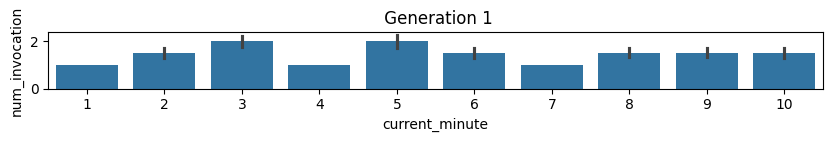

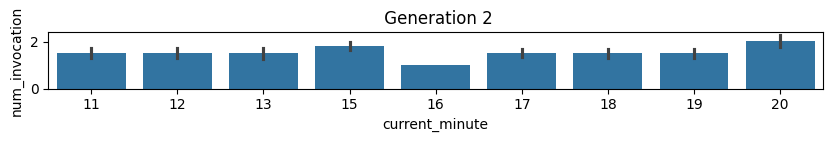

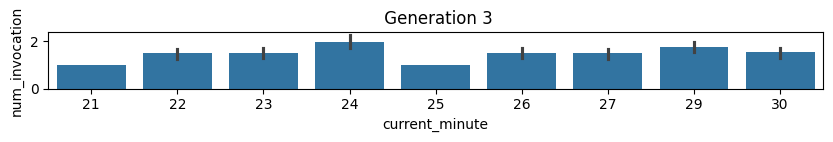

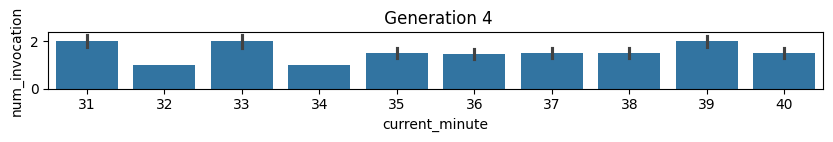

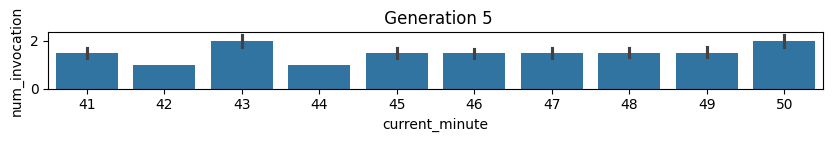

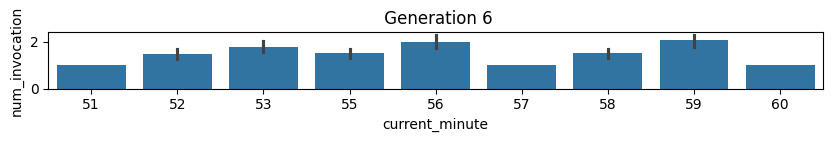

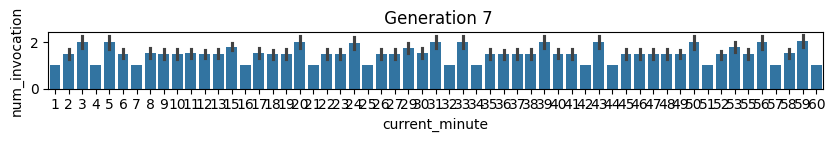

<Figure size 640x480 with 0 Axes>

In [117]:

import seaborn as sns
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 6))
    plt.subplot(len(dfs), 1, i + 1)
    sns.barplot(x='current_minute', y='num_invocation', data=df)
    plt.title('Gráfica de num_invocation en función del tiempo')
    plt.xlabel('current_minute')
    plt.ylabel('num_invocation')
    plt.title(f' Generation {i+1}')
    plt.show()
plt.tight_layout()
plt.show()

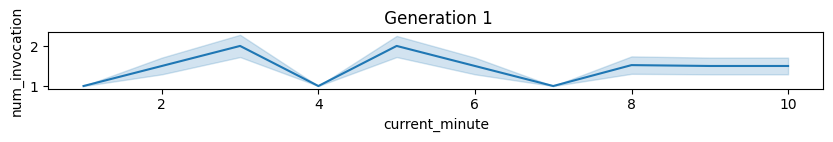

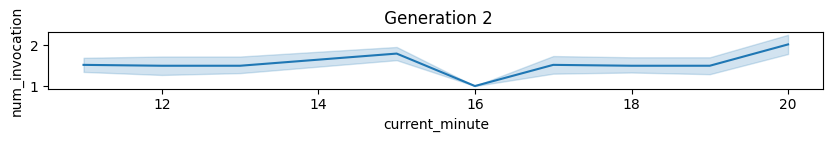

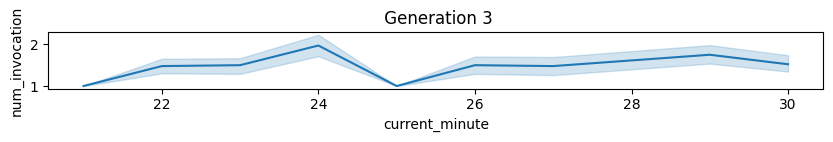

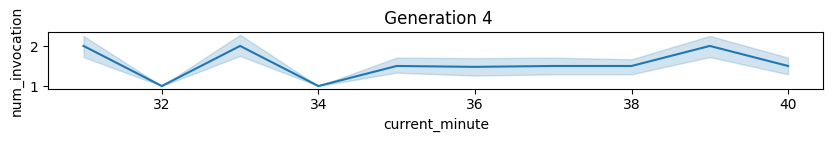

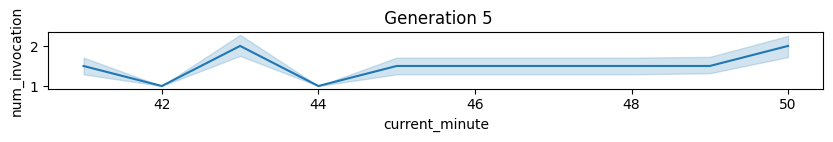

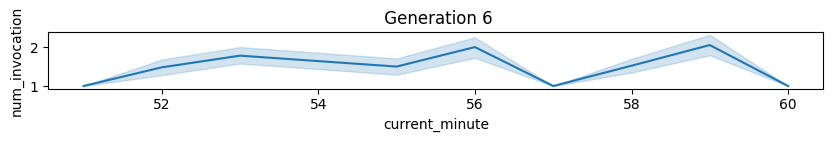

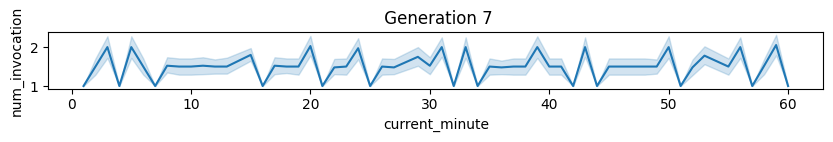

<Figure size 640x480 with 0 Axes>

In [118]:

for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 6))
    plt.subplot(len(dfs), 1, i + 1)
    sns.lineplot(x='current_minute', y='num_invocation', data=df)
    plt.title('Gráfica de num_invocation en función del tiempo')
    plt.xlabel('current_minute')
    plt.ylabel('num_invocation')
    plt.title(f' Generation {i+1}')
    plt.show()
plt.tight_layout()
plt.show()

In [119]:
for i, df in enumerate(dfs):
    df['memory_usage'] = df['memory_usage']/10**9
    df['real_time'] = df['real_time'] /10

In [120]:
df['memory_usage'] 

0       2.258940
1       2.258940
2       2.684441
3       2.684441
4       2.684441
          ...   
1433    4.209959
1434    4.769997
1435    4.769997
1436    4.769997
1437    4.769997
Name: memory_usage, Length: 1438, dtype: float64

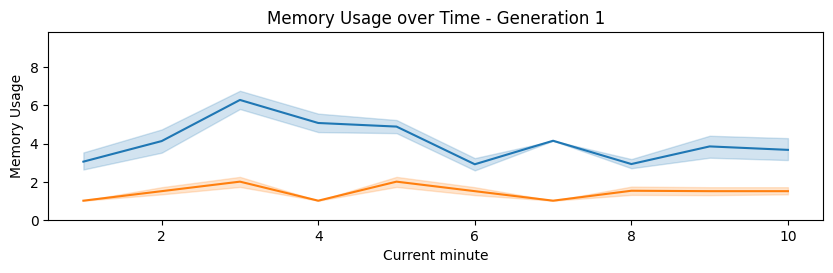

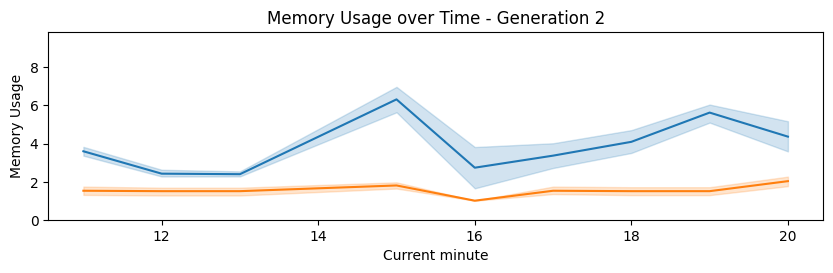

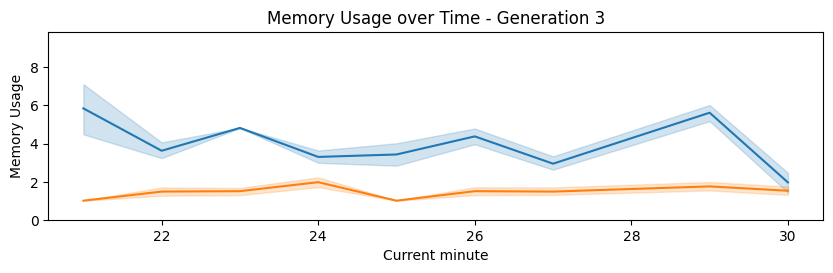

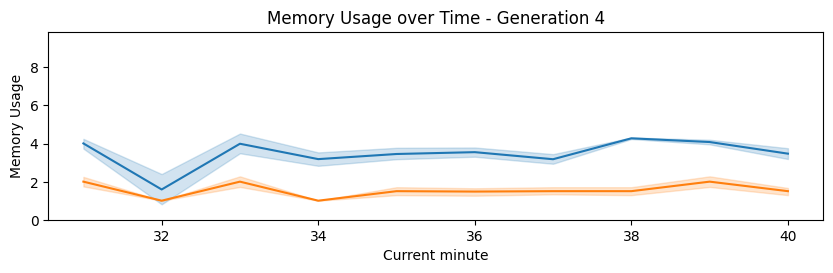

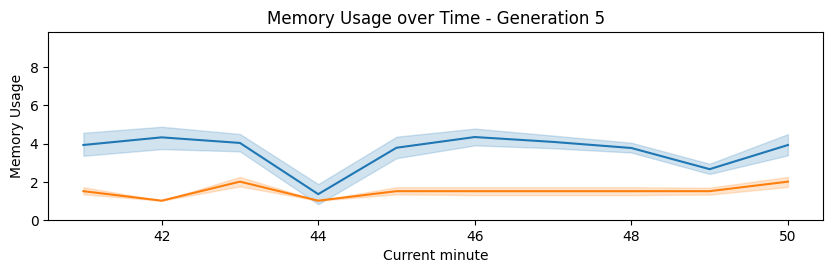

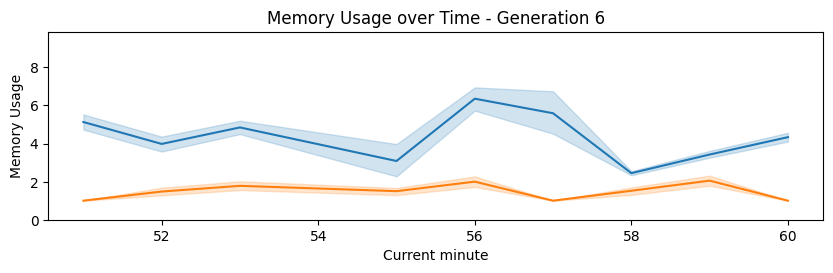

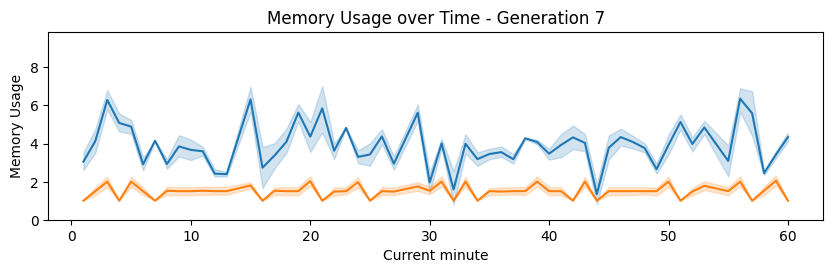

<Figure size 640x480 with 0 Axes>

In [121]:

max_memory_usage = max(df['memory_usage'].max() for df in dfs)
# Iterar a través del array de DataFrames y trazar el uso de memoria vs tiempo
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 20))
    plt.subplot(len(dfs), 1, i + 1)
    sns.lineplot(x='current_minute', y='memory_usage', data=df)
    sns.lineplot(x='current_minute', y='num_invocation', data=df)
    plt.xlabel('Current minute')
    plt.ylabel('Memory Usage')
    plt.title(f'Memory Usage over Time - Generation {i+1}')
    plt.ylim(0, max_memory_usage)
    plt.show()
plt.tight_layout()
plt.show()

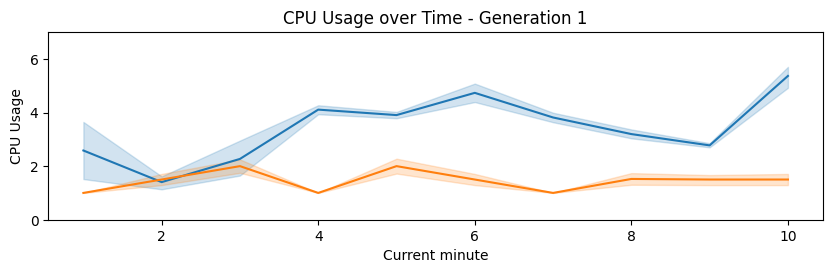

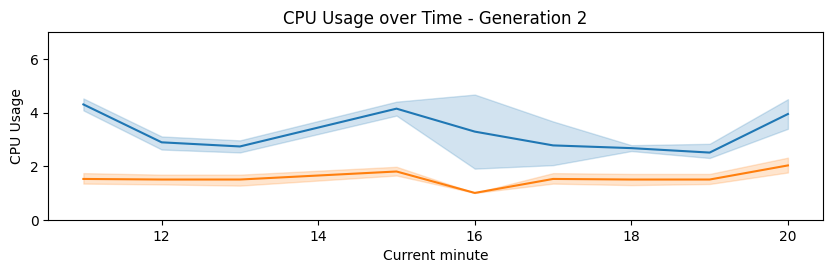

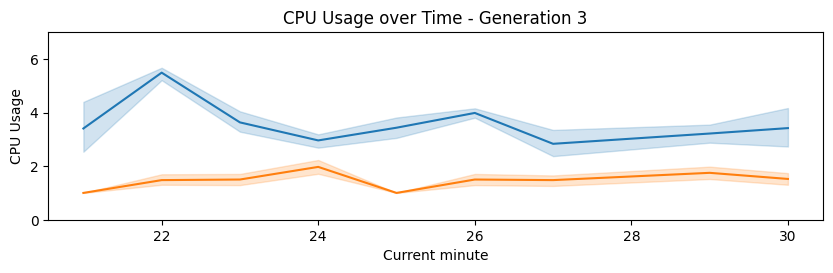

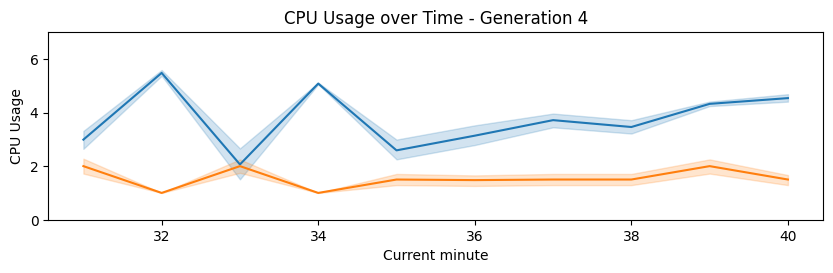

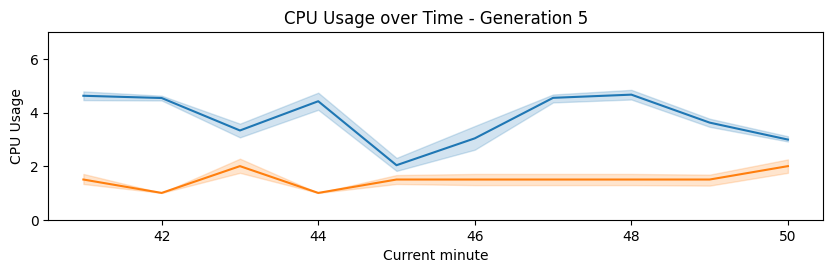

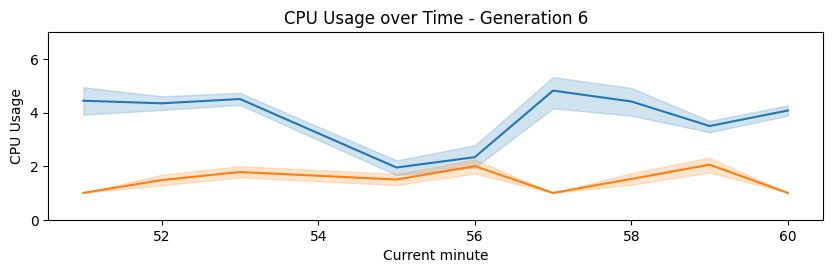

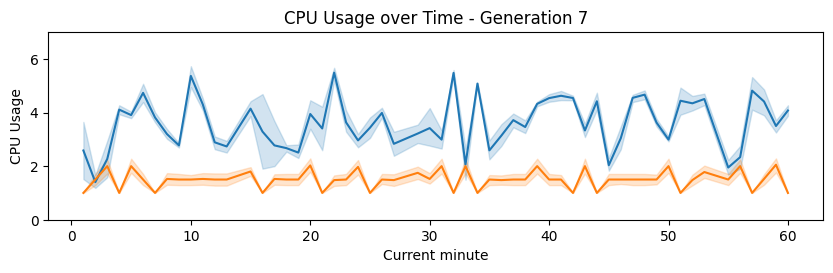

<Figure size 640x480 with 0 Axes>

In [122]:

max_cpu_usage = max(df['cpu_usage'].max() for df in dfs)
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 20))
    plt.subplot(len(dfs), 1, i + 1)
    sns.lineplot(x='current_minute', y='cpu_usage', data=df)
    sns.lineplot(x='current_minute', y='num_invocation', data=df)
    plt.xlabel('Current minute')
    plt.ylabel('CPU Usage')
    plt.title(f'CPU Usage over Time - Generation {i+1}')
    plt.ylim(0, max_cpu_usage)
    plt.show()
plt.tight_layout()

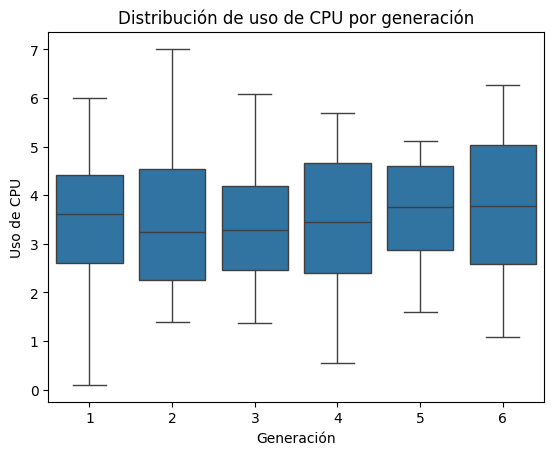

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
sns.boxplot(x="gen", y="cpu_usage", data=dfs[len(dfs)-1])
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Distribución de uso de CPU por generación')
plt.xlabel('Generación')
plt.ylabel('Uso de CPU')
plt.show()

In [124]:
genMemoryMean = dfs[-1].groupby(['gen'])[
    'memory_usage'].mean().reset_index()
gennum_invocationMean = dfs[-1].groupby(['gen'])[
    'cpu_usage'].mean().reset_index()
genreal_timeMean = dfs[-1].groupby(['gen'])[
    'real_time'].mean().reset_index()
# gen_opt_cpu = df_opt.groupby(['gen'])[
#     'memory_usage'].mean().reset_index()

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='gen', y='real_time', data=genMemoryMean,color='green')
sns.barplot(x='gen', y='memory_usage', data=genreal_timeMean, color = 'red')
# sns.barplot(x='gen', y='memory_usage', data=genMemoryMean, color='blue')
# sns.barplot(x='gen', y='cpu_usage', data=gennum_invocationMean)
plt.title('Gráfica de num_invocation en función del tiempo')
plt.xlabel('memory_usage')
plt.ylabel('Generation')
plt.title(f' Generation ')
plt.show()
plt.tight_layout()

ValueError: Could not interpret value `real_time` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

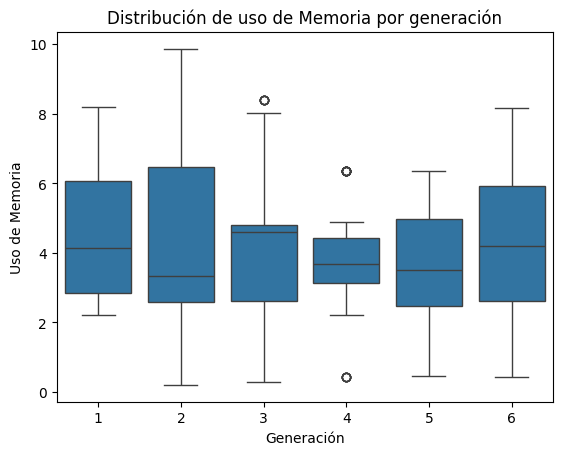

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
sns.boxplot(x="gen", y="memory_usage", data=dfs[len(dfs)-1])
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Distribución de uso de Memoria por generación')
plt.xlabel('Generación')
plt.ylabel('Uso de Memoria')
plt.show()

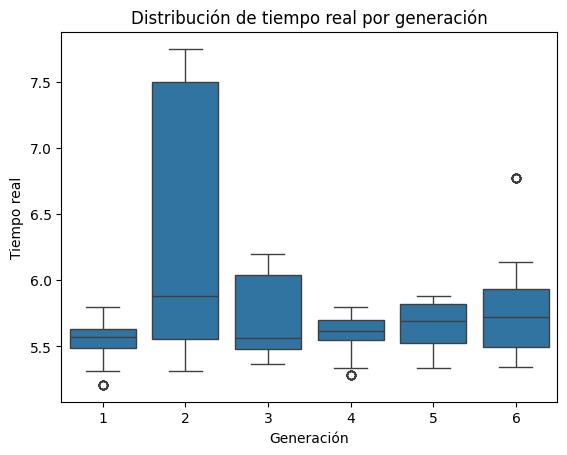

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
sns.boxplot(x="gen", y="real_time", data=dfs[len(dfs)-1])
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Distribución de tiempo real por generación')
plt.xlabel('Generación')
plt.ylabel('Tiempo real')
plt.show()

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
sns.boxplot(x="gen", y="real_time", data=dfs[len(dfs2)-1])
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Distribución de tiempo real por generación')
plt.xlabel('Generación')
plt.ylabel('Tiempo real')
plt.show()

NameError: name 'dfs2' is not defined

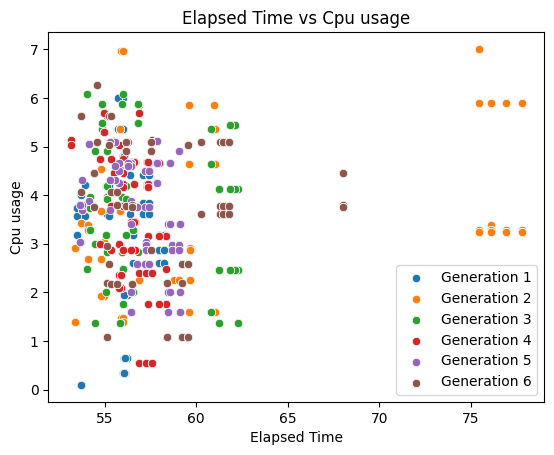

In [128]:
for i, df in enumerate(dfs[:-1]):
    sns.scatterplot(x='elapsed_time', y='cpu_usage', data=df, label=f'Generation {i+1}')

plt.xlabel('Elapsed Time')
plt.ylabel('Cpu usage')
plt.title('Elapsed Time vs Cpu usage')
plt.legend()
plt.show()

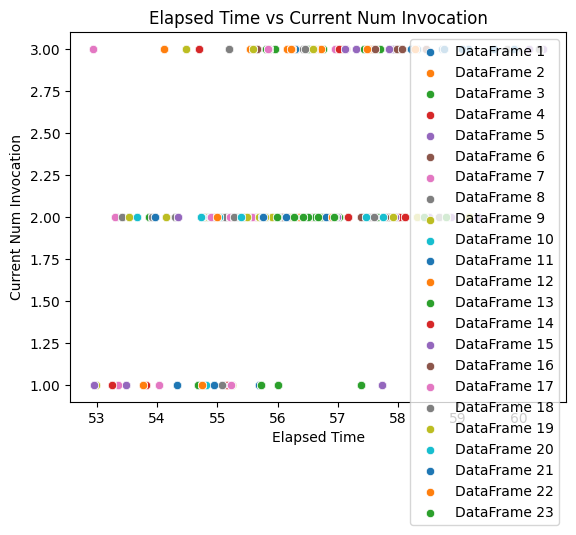

In [ ]:
for i, df in enumerate(dfs[:-1]):
    sns.scatterplot(x='elapsed_time', y='current_num_invocation', data=df, label=f'DataFrame {i+1}')

plt.xlabel('Elapsed Time')
plt.ylabel('Current Num Invocation')
plt.title('Elapsed Time vs Current Num Invocation')
plt.legend()
plt.show()

In [ ]:
# Mapa de calor
pivot_table = df.pivot_table(index='current_minute', columns='cpu_usage', values='cpu_usage', aggfunc='count')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis')
plt.xlabel('Current Num Invocation')
plt.ylabel('Elapsed Time')
plt.title('Heatmap: Elapsed Time vs Current Num Invocation')
plt.show()

ValueError: Grouper for 'cpu_usage' not 1-dimensional